In [37]:
import numpy as np
import hysteresis as hys
import pandas as pd
import matplotlib.pyplot as plt

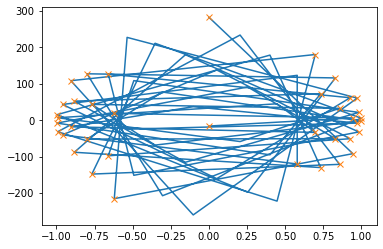

In [38]:
df = pd.read_csv('../dataset\Rawdata.csv')
data = df.to_numpy()

data_set = data.reshape(90,5,62)
Xtr = data_set[18]

# y = np.linspace(0, 5, 5)
# x = np.linspace(0, 62, 62)
t = np.linspace(90,5,62)*np.pi
x = np.sin(t)
y = np.cos(t)*t
xy = np.column_stack([x,y])

myHys = hys.Hysteresis(xy)
myHys.plot(plotCycles = True)

In [39]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [41]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [42]:
dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

C:\Users\maeda\AppData\Local\Temp\ipykernel_15756\3232005565.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


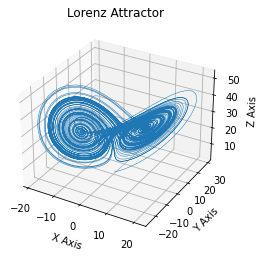

In [43]:

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

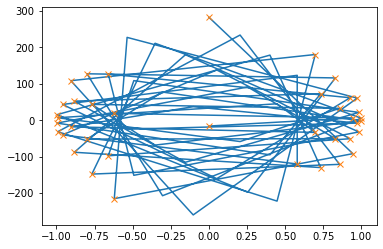

In [10]:
t = np.linspace(90,5,62)*np.pi
x = np.sin(t)
y = np.cos(t)*t
xy = np.column_stack([x,y])

myHys = hys.Hysteresis(xy)
myHys.plot(plotCycles = True)

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'Applied Force (kN)')

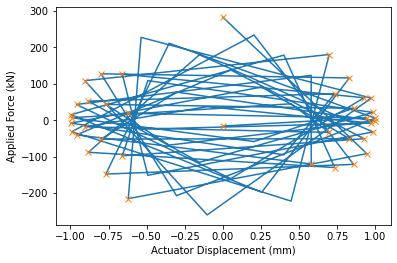

In [11]:
fig, ax = plt.subplots()
line = myHys.plot(plotCycles=True)
ax.set_xlabel('Actuator Displacement (mm)')
ax.set_ylabel('Applied Force (kN)')